# Step 1: Overview and Dataset Selection

Description:
The project is about on world's largest taxi company Uber inc. In this project, we're looking to predict the fare for their future transactional cases. Uber delivers service to lakhs of customers daily. Now it becomes really important to manage their data properly to come up with new business ideas to get best results. Eventually, it becomes really important to estimate the fare prices accurately.

The datset contains the following fields:

key - a unique identifier for each trip

fare_amount - the cost of each trip in usd

pickup_datetime - date and time when the meter was engaged

passenger_count - the number of passengers in the vehicle (driver entered value)

pickup_longitude - the longitude where the meter was engaged

pickup_latitude - the latitude where the meter was engaged

dropoff_longitude - the longitude where the meter was disengaged

dropoff_latitude - the latitude where the meter was disengaged

Acknowledgement:
The dataset is referred from Kaggle.

Objective:

Understand the Dataset & cleanup (if required).

Build Regression models to predict the fare price of uber ride.

Also evaluate the models & compare thier respective scores like R2, RMSE, etc.


# Step 2: Load the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Step 3: Load the dataset 

In [2]:
df = pd.read_csv('data/Uber Fares Dataset/uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [4]:
df.tail()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
199995,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1
199999,2010-05-15 04:08:00.00000076,14.1,2010-05-15 04:08:00 UTC,-73.984395,40.720077,-73.985508,40.768793,1


# Step 4: Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                200000 non-null  object 
 1   fare_amount        200000 non-null  float64
 2   pickup_datetime    200000 non-null  object 
 3   pickup_longitude   200000 non-null  float64
 4   pickup_latitude    200000 non-null  float64
 5   dropoff_longitude  199999 non-null  float64
 6   dropoff_latitude   199999 non-null  float64
 7   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 12.2+ MB


In [6]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [7]:
df.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [8]:
df.shape

(200000, 8)

In [9]:
df.dropna(inplace = True)

In [10]:
df.shape

(199999, 8)

In [11]:
df.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [12]:
df.drop('key', axis = 1, inplace = True)

In [13]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime']).astype('int64')

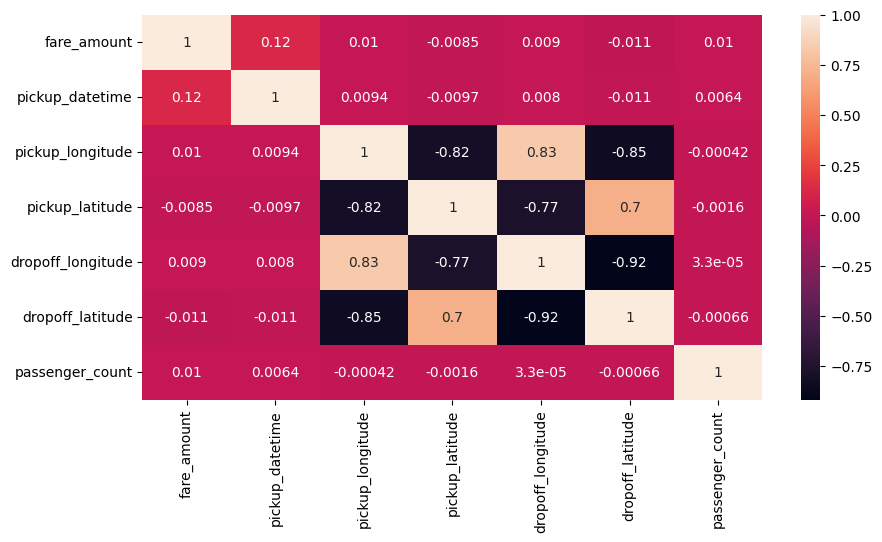

In [14]:
plt.figure(figsize = (10, 5))
sns.heatmap(df.corr(), annot = True)
plt.show()

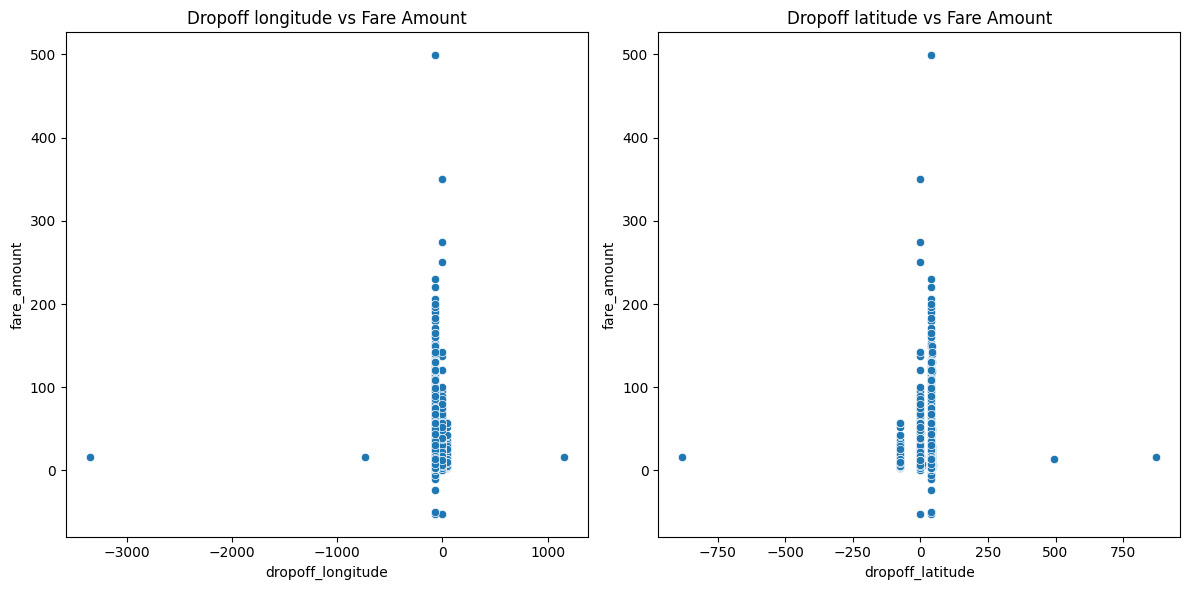

In [15]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'dropoff_longitude', y = 'fare_amount', data = df)
plt.title('Dropoff longitude vs Fare Amount')

plt.subplot(1, 2, 2)
sns.scatterplot(x = 'dropoff_latitude', y = 'fare_amount', data = df)
plt.title('Dropoff latitude vs Fare Amount')

plt.tight_layout()
plt.show()

In [16]:
features_selected = list(df.drop('fare_amount', axis = 1).columns)
# features_selected
# for feature in features_selected:
#     Q1 = np.percentile(df[feature], 0.25)
#     Q3 = np.percentile(df[feature], 0.75)

#     IQR         = Q3 - Q1
#     lower_fence = Q1 - 1.5 * IQR
#     upper_fence = Q3 + 1.5 * IQR

#     df = df[(df[feature] > lower_fence) & (df[feature] < upper_fence)]

In [18]:
feature_labels = features_selected

scaler          = StandardScaler()
scaled_features = scaler.fit_transform(df[feature_labels])
df_scaled       = pd.DataFrame(scaled_features, columns = feature_labels)

# Step 5: Split the Data

In [19]:
X = df_scaled
y = df['fare_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"\n Training set shape: ", X_train.shape)
print(f"\n Testing set shape: ", X_test.shape)


 Training set shape:  (159999, 6)

 Testing set shape:  (40000, 6)


# Step 6: Train the model

In [20]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

for feature, coef in zip(feature_labels, lr_model.coef_):
    print(f"\n Feature {feature} has coefficient: {coef:.4f}")
print(f"\n Intercept is: {lr_model.intercept_:.4f}")


 Feature pickup_datetime has coefficient: 1.1997

 Feature pickup_longitude has coefficient: 0.0633

 Feature pickup_latitude has coefficient: -0.0159

 Feature dropoff_longitude has coefficient: -0.0857

 Feature dropoff_latitude has coefficient: -0.0857

 Feature passenger_count has coefficient: 0.0906

 Intercept is: 11.3542


# Step 8: Evaluate the Model

In [21]:
y_pred = lr_model.predict(X_test)
mse    = mean_squared_error(y_test, y_pred)
r2     = r2_score(y_test, y_pred)

print(f"\n Mean squared error: ", mse)
print(f"\n R2 score : ", r2)


 Mean squared error:  102.37695881457029

 R2 score :  0.015832657225571145
